# WHO Life Expectancy Project

### Team Analytica

Table of contents?

## Import libraries

In [10]:
## Import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Import data

In [22]:
## Read in the dataset -- Redo path

who = pd.read_csv("Life Expectancy Data.csv")

In [31]:
## Display all the columns

pd.set_option("display.max_columns", None)

In [61]:
## View the first 5 records

who.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


## Train-test split

In [39]:
## Seperate features and target for train/test splitting

# Split the target from the columns
feature_cols = list(who.columns)
feature_cols.remove('Life_expectancy')

# Create X (features), and y (target) variables.
X = who[feature_cols]
y = who['Life_expectancy']

In [41]:
## Use the train-test split function from sklearn
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0, 
                                                    stratify = who['Region']) # Stratify by region so both train and test sets contain at least one of each region

In [47]:
## Visually check that the number of records between X and y (across Train and Test) both match:

print(f"X_train:   {X_train.shape}\ny_train:   {y_train.shape}\n")
print(f"X_test:    {X_test.shape}\ny_test:    {y_test.shape}")

X_train:   (2291, 20)
y_train:   (2291,)

X_test:    (573, 20)
y_test:    (573,)


In [49]:
## Assert that the indicies and number of records between X and y (across Train and Test) both match:

# Indicies
assert(all(X_train.index == y_train.index)), "There is some index mismatch in Train"
assert(all(X_test.index == y_test.index)), "There is some index mismatch in Test"

# Number of records
assert(X_train.shape[0] == y_train.shape[0]), "There is some records mismatch in Train"
assert(X_test.shape[0] == y_test.shape[0]), "There is some records mismatch in Test"

## Initial data exploration

In [87]:
## Overview across both test and train

print("****Overview****:")
who.info()

****Overview****:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  

In [95]:
## Check for duplicate records

print(f"Number of duplicate records: {who.duplicated().sum()}")

Number of duplicate records: 0


There are no null values or duplicated records in the entire dataset. All further EDA will be conducted on the train dataset only.

In [392]:
## Create a dataframe of the train data

# Copy the features dataframe
who_train = X_train.copy()

# Add the target column
who_train['Life_expectancy'] = y_train

# View the first 5 records
#who_train.head()

In [101]:
## Summary statistics

who_train.describe(include = 'all')

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2291,2291,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000
unique,179,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Comoros,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2007.536010,30.118682,42.654736,192.704590,4.779211,84.402008,77.304234,25.032780,86.546486,86.339153,0.931990,11351.904845,35.284042,4.866565,4.893627,7.625447,0.202968,0.797032,68.840681
std,NaN,NaN,4.623359,27.093242,44.101280,115.937801,3.999059,15.739289,18.819378,2.180147,15.016233,15.414158,2.514854,16670.721250,130.762826,4.391000,4.472880,3.165239,0.402297,0.402297,9.386282
min,NaN,NaN,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,NaN,NaN,2004.000000,8.200000,9.800000,106.967500,1.160000,78.000000,64.000000,23.250000,81.000000,81.000000,0.080000,1422.000000,2.090000,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,NaN,NaN,2008.000000,19.800000,23.200000,163.096500,3.910000,89.000000,83.000000,25.500000,93.000000,93.000000,0.160000,4208.000000,7.770000,3.300000,3.300000,7.800000,0.000000,1.000000,71.300000
75%,NaN,NaN,2012.000000,46.950000,65.850000,247.301500,7.705000,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12003.500000,23.575000,7.200000,7.250000,10.300000,0.000000,1.000000,75.400000


In [105]:
## Checking for null values

def null_vals(df):
    '''function to show both number of nulls and the percentage of nulls in each column'''
    null_count = df.isnull().sum() # Count the number of nulls in each column
    null_percentage = (null_count / len(df)) * 100  # The number of nulls as a percentage
    null_df = pd.DataFrame({'Null_count': null_count,
                            'Null_percentage': round(null_percentage,3)
                           })

    return null_df.sort_values('Null_percentage', ascending=False) # Sort by descending percentage

In [103]:
null_vals(who_train) # Confirms that there are no null values

,Null_count,Null_percentage
Country,0,0.0
Diphtheria,0,0.0
Economy_status_Developing,0,0.0
Economy_status_Developed,0,0.0
Schooling,0,0.0
Thinness_five_nine_years,0,0.0
Thinness_ten_nineteen_years,0,0.0
Population_mln,0,0.0
GDP_per_capita,0,0.0
Incidents_HIV,0,0.0


In [127]:
## Checking for columns with '0' values

def zero_vals(df):
    '''function to show both number of zero values and the percentage of zero values in each column'''
    zero_col = (df == 0) # Boolean mask where there is a zero value
    zero_count = zero_col.sum(axis=0) # Count the number of zeros in each column
    zero_percentage = (zero_count / len(df)) * 100  # The number of zeros as a percentage
    zero_df = pd.DataFrame({'Zero_count': zero_count,
                            'Zero_percentage': round(zero_percentage,3)
                           })

    return zero_df.sort_values('Zero_percentage', ascending=False) # Sort by descending percentage 

In [129]:
zero_vals(who_train)

,Zero_count,Zero_percentage
Economy_status_Developed,1826,79.703
Economy_status_Developing,465,20.297
Alcohol_consumption,31,1.353
Country,0,0.000
Diphtheria,0,0.000
Schooling,0,0.000
Thinness_five_nine_years,0,0.000
Thinness_ten_nineteen_years,0,0.000
Population_mln,0,0.000
GDP_per_capita,0,0.000


The columns containing zero are all columns where a zero value represents meaningful information, and not missing data.

## Checking for a linear relationship between the target and features

### Correlation matrix

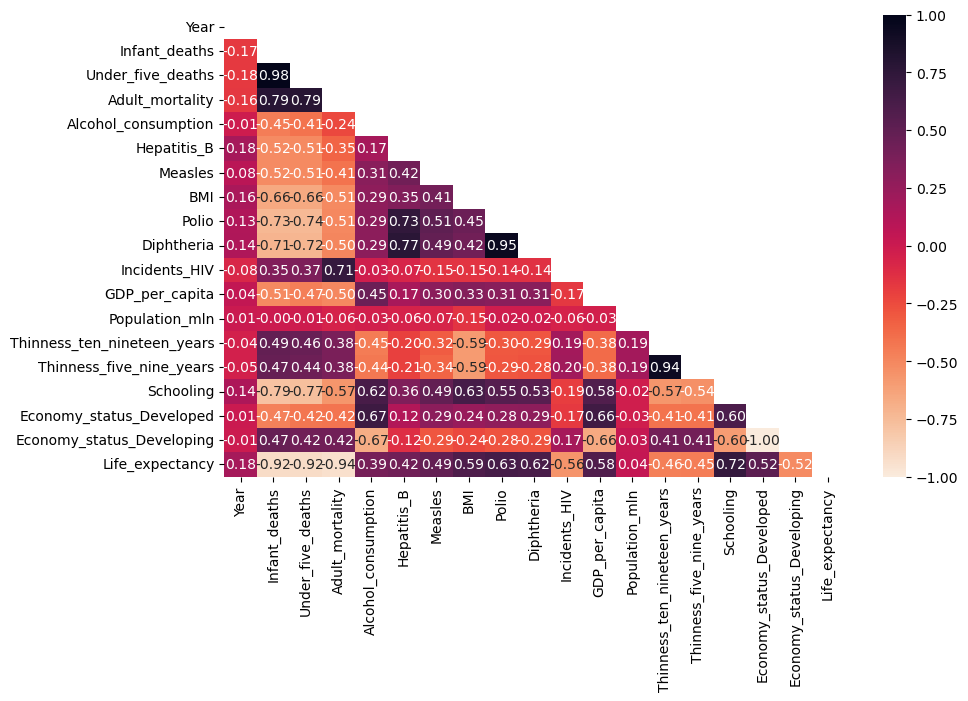

In [140]:
## Plot a correlation matrix 

# Calculate the correlation between each numerical column 
who_train_corr = who_train.corr(numeric_only = True)

# Plot the matrix
plt.figure(figsize = (10,6))

sns.heatmap(
    data = who_train_corr,
    annot = True,
    cmap = 'rocket_r',
    vmin = -1,
    vmax = 1 ,
    fmt = '.2f',
    mask = np.triu(who_train_corr)
    )

plt.show()

> **<u>Key Points<u>**:
> - Concerns of multicollinearity between:
     - Polio, Diphtheria and Hepatitis_B
       - There is a 3 in 1 booster vaccine for tetanus, polio and diphtheria according to the [NHS](https://www.nhs.uk/vaccinations/td-ipv-vaccine-3-in-1-teenage-booster/), which might partially explain this correlation.
     - Infant_deaths, Under_five_deaths and Adult_mortality
     - Thinness_five_nine_years and Thinness_ten_nineteen_years
> - Quite a few columns with a non-strong correlation with the target (Life_expectancy) e.g., alcohol_consumption.

### Visualising the relationship: scatterplot

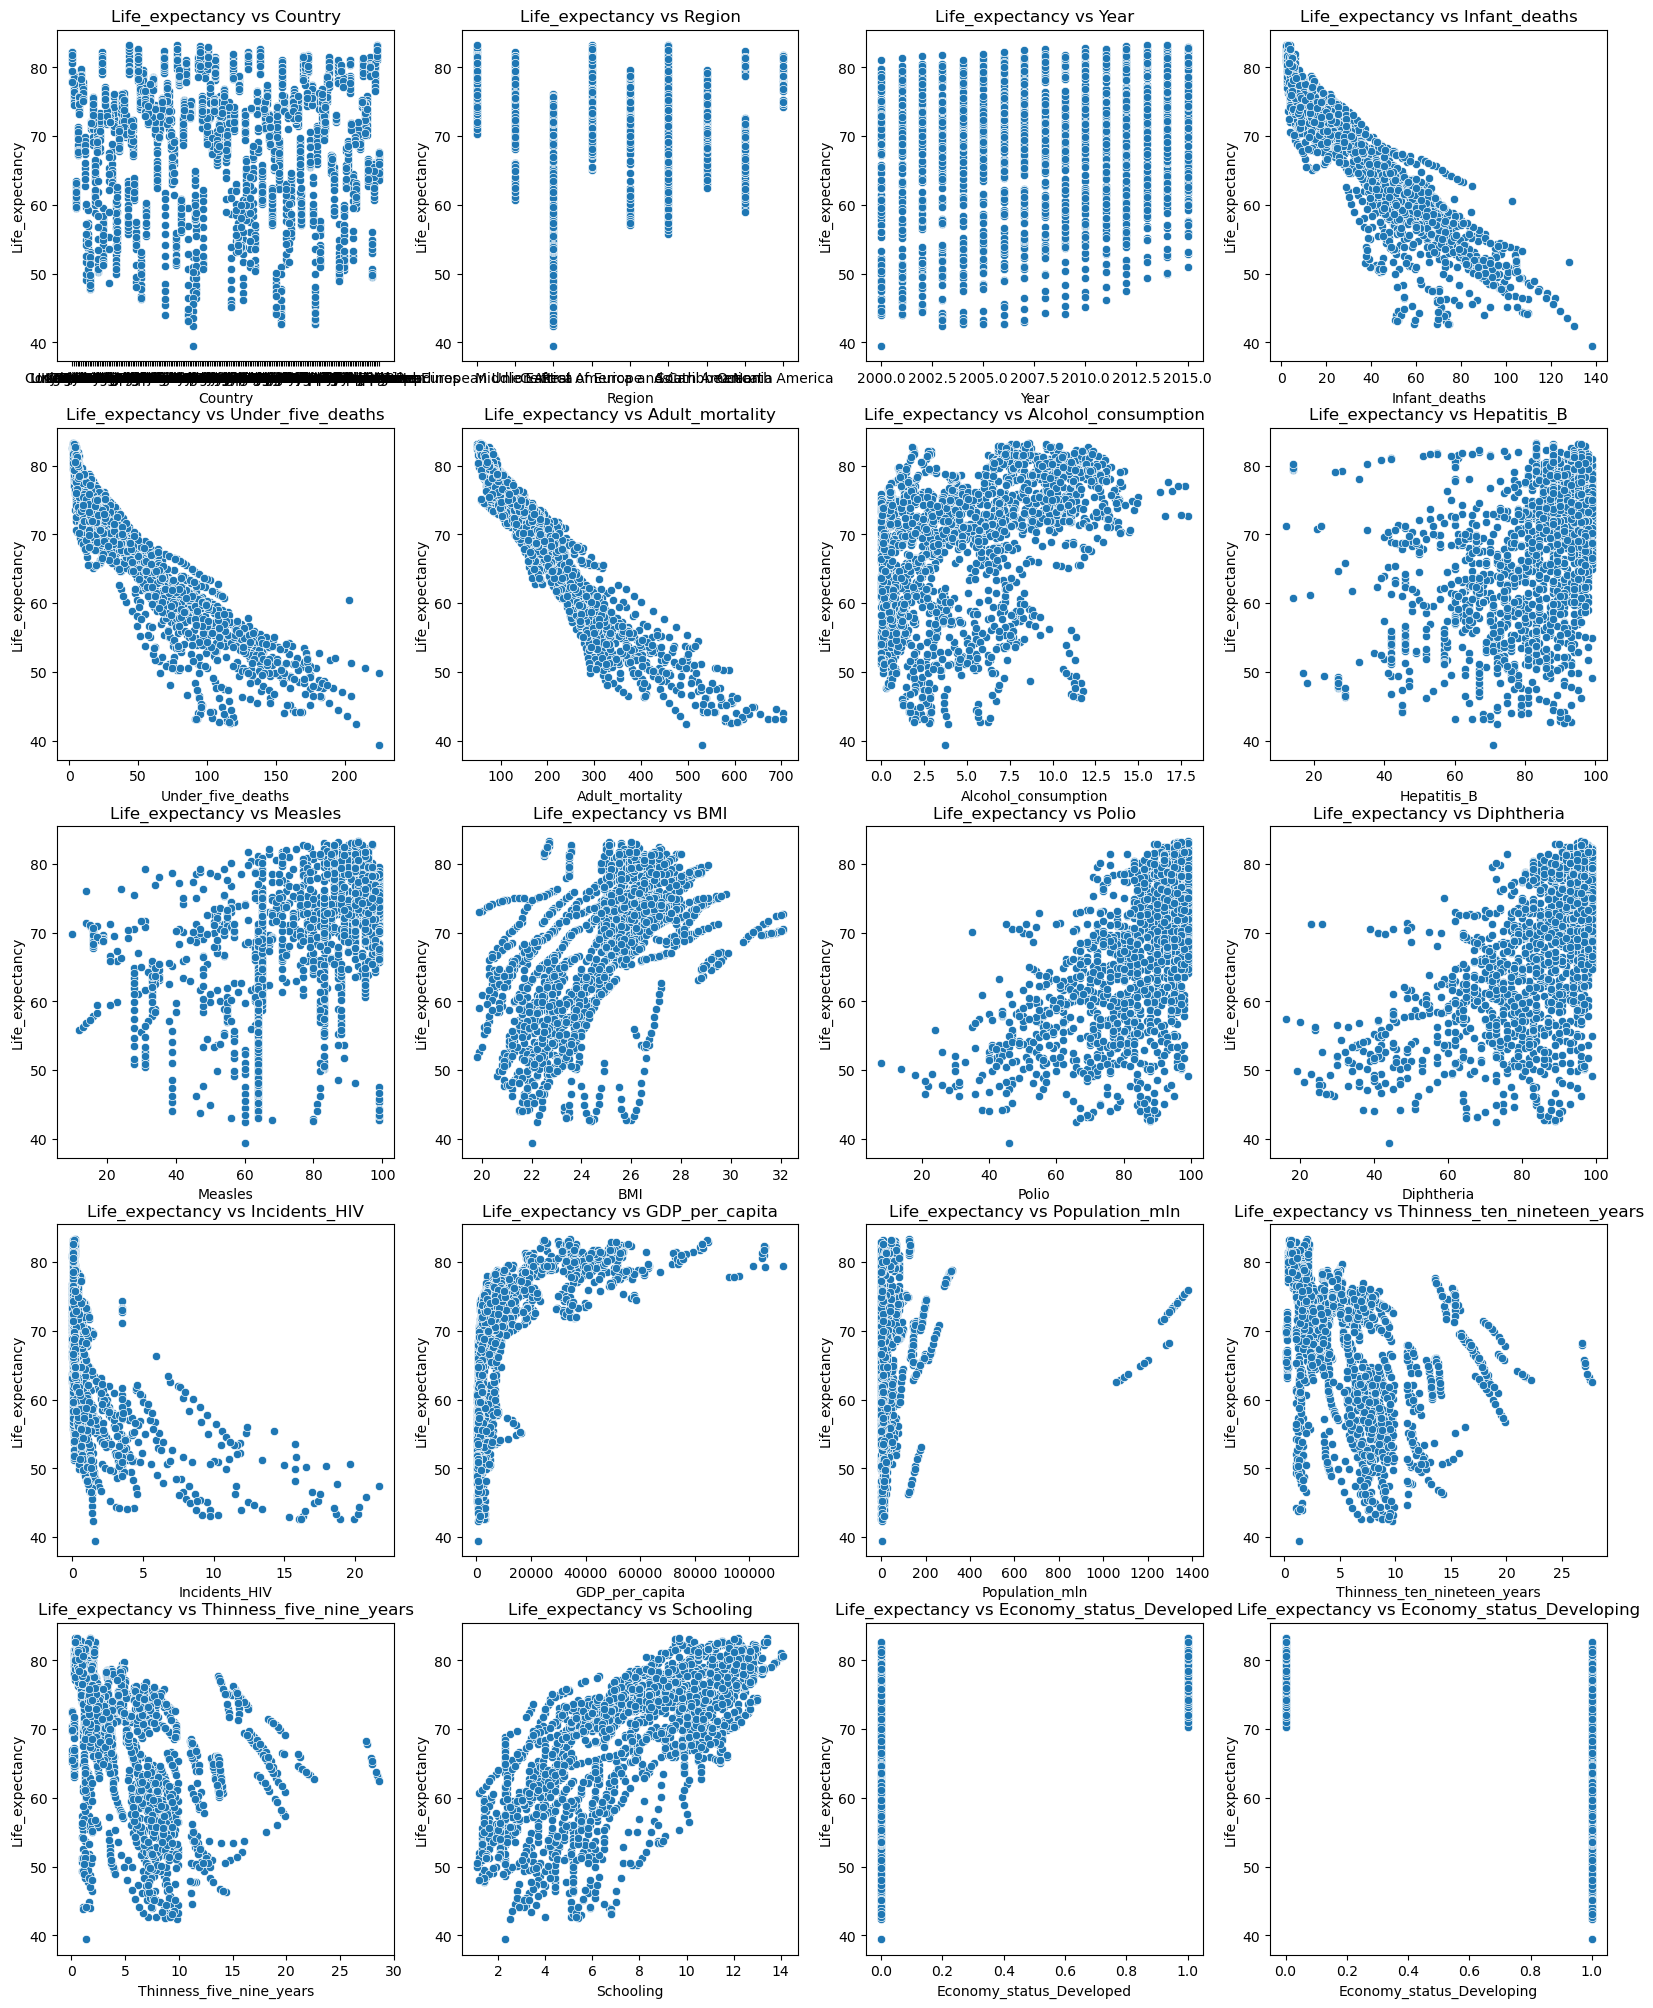

In [389]:
## Plot a scatterplot for each feature against the target

# Create subplots to fit 20 features 
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.flatten()  # Flatten to allow us to loop through it

# Loop through the feature columns and plot each on a subplot
for i, column in enumerate(feature_cols): # Enumerate gives the index and column name

    # Plot the scatterplot
    sns.scatterplot(x=who_train[column], y=who_train['Life_expectancy'], ax=axes[i])

    # Give a title for each subplot
    axes[i].set_title(f'Life_expectancy vs {column}')

> **<u>Key Points<u>**:
> - Non-linear relationship features:
>   - Alcohol_consumption
>   - Hepatitis_B
>   - Thinness_five_nine_years
>   - Thinness_ten_nineteen_years
>   - Measles
>   - Population_mln
> - Logarithmic relationship with Incidents_HIV and GDP_per_capita
> - Rest are linear, or non-continuous features.

     

### Logarithmic transformation of certain features

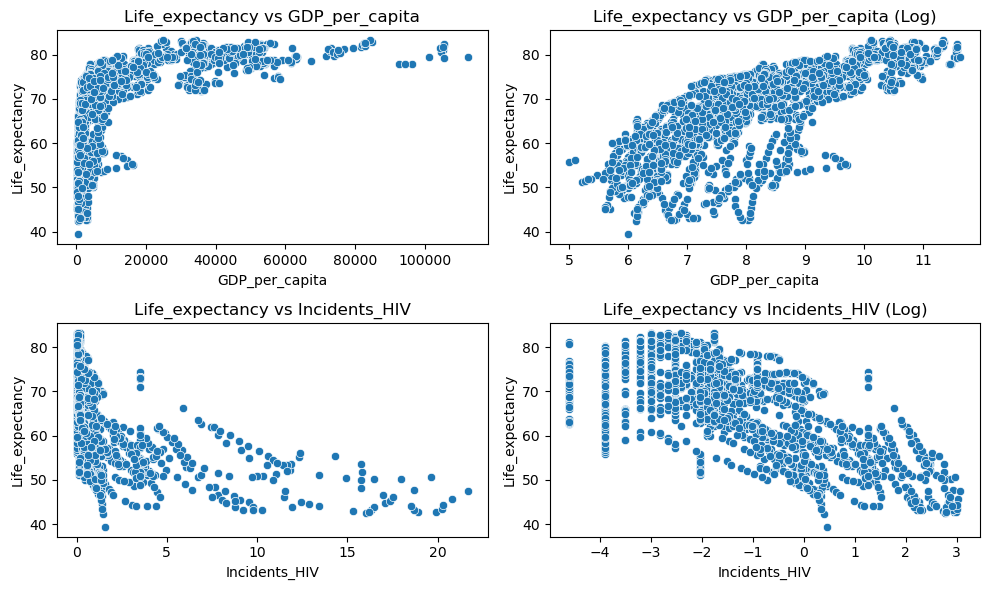

In [381]:
## Visualising the log transformation of Incidents_HIV and GDP_per_capita

# Create subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Log vs non-log distribution GDP_per_capita
sns.scatterplot(x=who_train['GDP_per_capita'], 
                y=who_train['Life_expectancy'], 
                ax=axes[0][0])
axes[0][0].set_title('Life_expectancy vs GDP_per_capita')

sns.scatterplot(x=np.log(who_train['GDP_per_capita']), 
                y=who_train['Life_expectancy'], 
                ax=axes[0][1])
axes[0][1].set_title('Life_expectancy vs GDP_per_capita (Log)')

# Log vs non-log distribution of Incidents_HIV
sns.scatterplot(x=who_train['Incidents_HIV'], 
                y=who_train['Life_expectancy'], 
                ax=axes[1][0])
axes[1][0].set_title('Life_expectancy vs Incidents_HIV')

sns.scatterplot(x=np.log(who_train['Incidents_HIV']), 
                y=who_train['Life_expectancy'], 
                ax=axes[1][1])
axes[1][1].set_title('Life_expectancy vs Incidents_HIV (Log)')

plt.tight_layout()
plt.show()

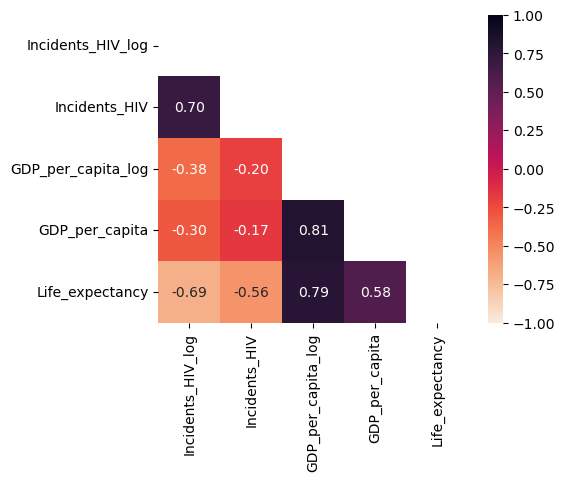

In [219]:
## Computing the correlation coefficient of the logged features

# Create new columns for the logged features
who_train['Incidents_HIV_log'] = np.log(who_train['Incidents_HIV'])
who_train['GDP_per_capita_log'] = np.log(who_train['GDP_per_capita'])

selected_columns = ['Incidents_HIV_log', 'Incidents_HIV', 'GDP_per_capita_log', 'GDP_per_capita', 'Life_expectancy']

# Calculate the correlation matrix
corr_log = who_train[selected_columns].corr()

# Plot the matrix
plt.figure(figsize = (5,4))
sns.heatmap(
    data = corr_log,
    annot = True,
    cmap = 'rocket_r',
    vmin = -1,
    vmax = 1 ,
    fmt = '.2f',
    mask = np.triu(corr_log)
)
plt.show()

> **<u>Key Points<u>**:
> - Logarithmic transformation of Incidents_HIV and GDP_per_capita shows a linear relationship.
> - The correlation between the target and features is stronger post log transformation.

## Distribution of features

Observe the distribution of the continuous linear relationship features.

In [371]:
## List of the features to plot

columns_to_plot = [
    'Under_five_deaths',
    'Infant_deaths',
    'Adult_mortality',
    'BMI',
    'Schooling',
    'GDP_per_capita', 
    'GDP_per_capita_log',
    'Incidents_HIV',
    'Incidents_HIV_log',
    'Diphtheria',
    'Polio'
]

# Year, Country, Region, Economic_status_Developed and Economic_status_Developing are either categorical or discrete

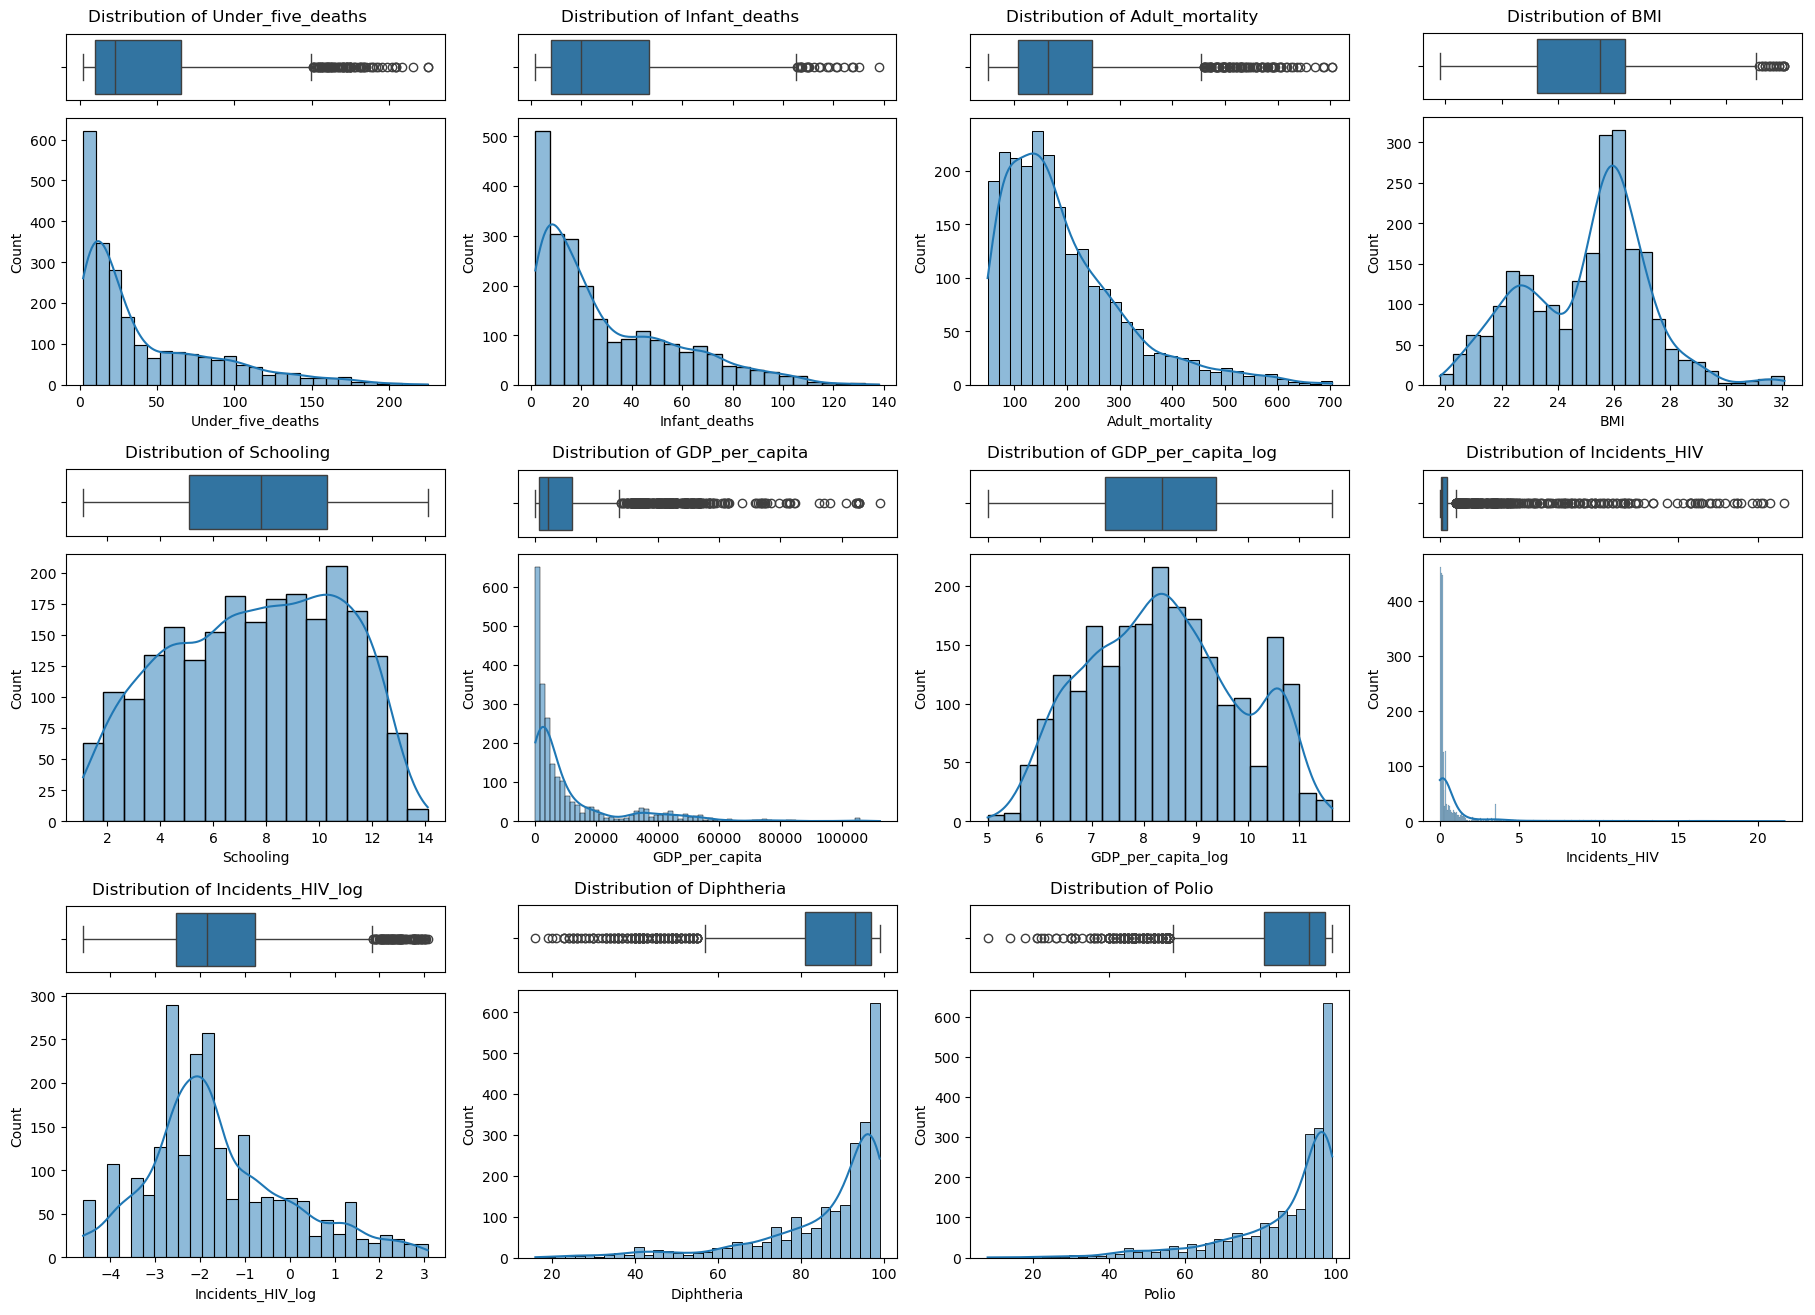

In [378]:
## Plot the distributions

# Create subfigures (outer grid) (one for each feature)
fig = plt.figure(layout='constrained', figsize=(18, 13))
subfigs = fig.subfigures(3, 4) # 3 rows and 4 columns

# Flatten to allow us to loop through it/easier indexing
subfigs = subfigs.flat

# Loop through each feature and the corresponding subfigure simultaneously:
for subfig, column in zip(subfigs, columns_to_plot):
    # Give a title to the subfigure
    subfig.suptitle(f'Distribution of {column}', fontsize = 12)
    
    # Create two subplots in the subfigure (inner grid)
    axs = subfig.subplots(2, 1, gridspec_kw={"height_ratios": [0.2, 0.8]}, sharex = True) # Ratio of 0.2:0.8 for the subplots
    
    # Plot a boxplot on the smaller subplot
    sns.boxplot(who_train[column], orient="h", ax=axs[0])
    
    # Plot a histogram on the larger subplot
    sns.histplot(who_train[column], kde=True, ax=axs[1])

# Display the plot
plt.show()

> **<u>Key Points<u>**:
> - Normally distributed features:
> - Heavy-tailed distributed features:
> - Features with a strong presence of outliers:
